In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import torch
test_model_name = "HuggingFaceH4/zephyr-7b-alpha"

test_tokenizer = AutoTokenizer.from_pretrained(test_model_name)
test_model = AutoModelForCausalLM.from_pretrained(
    test_model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

test_pipe = pipeline("text-generation", model=test_model, tokenizer=test_tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not in

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def build_prompt(predicted, ground_truth):
    return f"""You are a strict answer evaluator.
Compare the following student's answer to the ground truth, and reply only with "Yes" if they mean the same thing, or "No" if they do not.

Ground Truth Answer: {ground_truth}
Student's Answer: {predicted}

Do they mean the same thing? Answer:
"""

In [ ]:
def llama_judge(predicted, ground_truth):
    prompt = build_prompt(predicted, ground_truth)
    result = test_pipe(prompt, max_new_tokens=50, return_full_text=False)
    output = result[0]["generated_text"].strip().lower()

    if "yes" in output:
        return 1
    else:
        return 0

In [ ]:
pred = "The answer is six"
true = "6"

print("模型判定结果：", llama_judge(pred, true))

模型判定结果： 1


In [ ]:
def extract_pa_ta_similarity(file_path):
    result = []
    current_pair = {}

    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()

            if line.startswith("A:"):
                current_pair["PA"] = line[len("PA:"):].strip()
                # print(f"[Extracted PA] → {current_pair['PA']}")

            elif line.startswith("GT:"):
                current_pair["TA"] = line[len("TA:"):].strip()
                # print(f"[Extracted TA] → {current_pair['TA']}")

            elif "Semantic Similarity:" in line:
                parts = line.split("Semantic Similarity:")[1].split(",")[0].strip()
                try:
                    current_pair["Similarity"] = float(parts)
                except ValueError:
                    current_pair["Similarity"] = None

                # print(f"[Extracted Similarity] → {current_pair['Similarity']}")

                if "PA" in current_pair and "TA" in current_pair and "Similarity" in current_pair:
                    result.append(current_pair)
                    print(f"[Saved Record] {current_pair}")
                    current_pair = {}

    return result

In [ ]:
records = extract_pa_ta_similarity("1_100_100_quantized.txt")

[Saved Record] {'PA': 'Time-use research.', 'TA': 'Time-use research', 'Similarity': 0.9554}
[Saved Record] {'PA': 'Time.', 'TA': 'time', 'Similarity': 0.83053}
[Saved Record] {'PA': 'The International System of Units (SI) and the International System of Quantities.', 'TA': 'the International System of Units and International System of Quantities', 'Similarity': 0.90521}
[Saved Record] {'PA': 'Parmenides and Heraclitus.', 'TA': 'Parmenides and Heraclitus', 'Similarity': 0.9849}
[Saved Record] {'PA': 'Universal Time (UT).', 'TA': 'UT or UTC', 'Similarity': 0.69098}
[Saved Record] {'PA': 'Stimulants and depressants.', 'TA': 'Psychoactive drugs', 'Similarity': 0.59282}
[Saved Record] {'PA': 'A calendar.', 'TA': 'the calendar', 'Similarity': 0.88684}
[Saved Record] {'PA': 'A time machine is known as any technological device that is used to achieve time travel.', 'TA': 'to achieve time travel', 'Similarity': 0.63655}
[Saved Record] {'PA': 'The Fukushima Daiichi nuclear disaster.', 'TA': 'th

In [ ]:
from tqdm import tqdm

# 1. 构建 prompt 列表
prompts = [build_prompt(r["PA"], r["TA"]) for r in records]

# 2. 批量推理（默认 batch_size=1，可以手动设大一点，如 8、16）
outputs = test_pipe(prompts, max_new_tokens=50, return_full_text=False, batch_size=8)

# 3. 逐个解析
for record, output in zip(records, outputs):
    # output 是 [{'generated_text': ...}]
    text = output[0]["generated_text"].strip().lower()
    record["Model Prediction"] = 1 if "yes" in text else 0

In [ ]:
import pandas as pd
def compute_avg_accuracy(records):
    df = pd.DataFrame(records)

    # 1. 相似度平均值（作为“软准确度”）
    avg_similarity = df['Similarity'].mean()

    # 2. 模型预测平均值（作为“模型判断准确率”）
    avg_model_accuracy = df['Model Prediction'].mean()

    print(f" Average Similarity Score: {avg_similarity:.4f}")
    print(f" Model Prediction Accuracy: {avg_model_accuracy:.4f}")

    return avg_similarity, avg_model_accuracy
# compute_avg_accuracy(records)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_confusion_bar(records, thresholds=[0.9, 0.8, 0.7]):
    df = pd.DataFrame(records)
    results = []

    for threshold in thresholds:
        # Predicted by Similarity algorithm
        df['Similarity Prediction'] = df['Similarity'].apply(lambda x: 1 if x >= threshold else 0)

        # Ground Truth is from Model Prediction
        df['Ground Truth'] = df['Model Prediction']

        # Determine TP, FP, FN, TN
        df['Type'] = df.apply(
            lambda row: 'TP' if row['Similarity Prediction'] == 1 and row['Ground Truth'] == 1 else
                        'FP' if row['Similarity Prediction'] == 1 and row['Ground Truth'] == 0 else
                        'FN' if row['Similarity Prediction'] == 0 and row['Ground Truth'] == 1 else
                        'TN',
            axis=1
        )

        counts = df['Type'].value_counts()
        total = len(df)
        stats = {label: (counts.get(label, 0), counts.get(label, 0)/total) for label in ['TP', 'FP', 'FN', 'TN']}
        results.append((threshold, stats.copy()))

    # Plotting
    fig, axs = plt.subplots(1, len(thresholds), figsize=(5 * len(thresholds), 5))

    if len(thresholds) == 1:
        axs = [axs]

    for idx, (threshold, stats) in enumerate(results):
        labels = list(stats.keys())
        values = [f"{count}\n({ratio:.1%})" for count, ratio in stats.values()]
        counts = [count for count, _ in stats.values()]

        axs[idx].bar(labels, counts, color=['green', 'red', 'orange', 'blue'])
        axs[idx].set_title(f"Threshold = {threshold}")
        axs[idx].set_ylabel("Count")

        for i, v in enumerate(counts):
            axs[idx].text(i, v + 0.1, values[i], ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

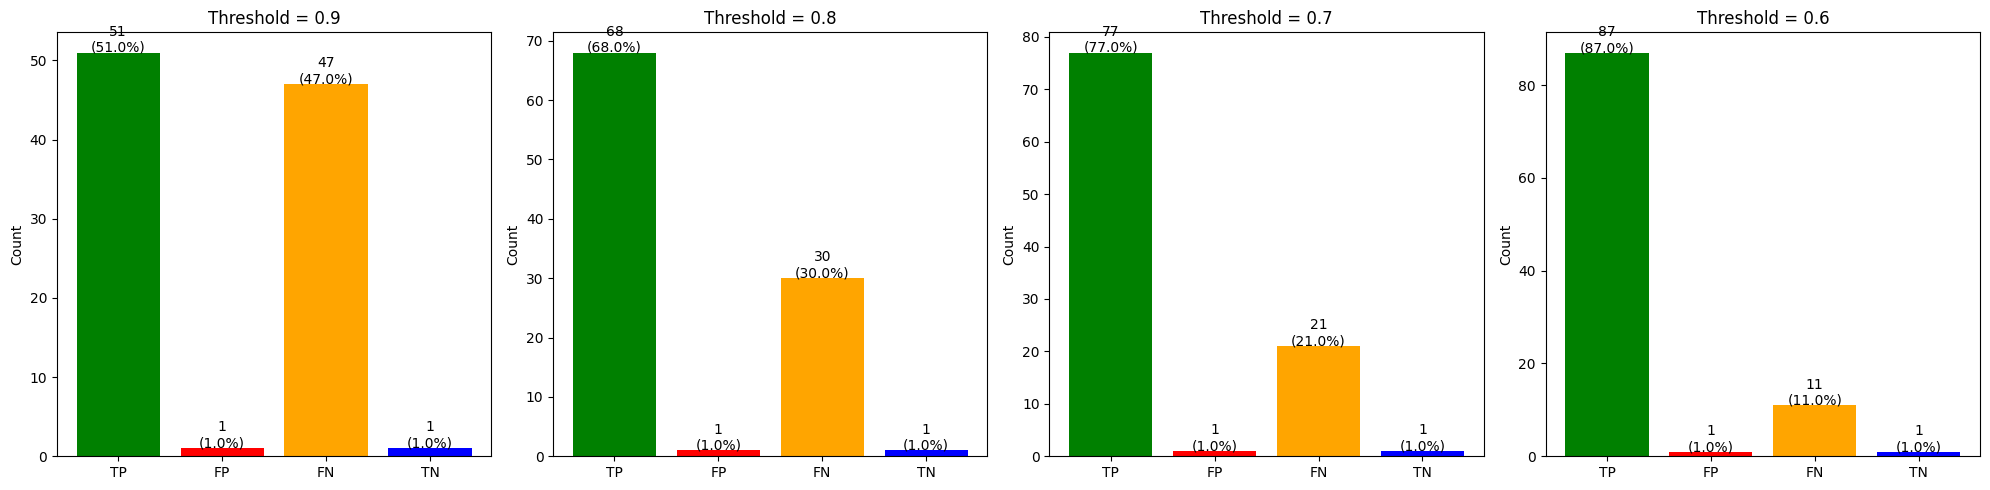

In [ ]:
plot_confusion_bar(records, thresholds=[0.9, 0.8, 0.7, 0.6])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_confusion_grouped_compact_ratio(records, thresholds=[0.9, 0.8, 0.7, 0.6]):
    df = pd.DataFrame(records)
    results = []

    for threshold in thresholds:
        # 1. 相似度算法的预测
        df['Similarity Prediction'] = df['Similarity'].apply(lambda x: 1 if x >= threshold else 0)
        # 2. LLM 作为 Ground Truth
        df['Ground Truth'] = df['Model Prediction']

        # 3. 分类统计
        df['Type'] = df.apply(
            lambda row: 'TP' if row['Similarity Prediction'] == 1 and row['Ground Truth'] == 1 else
                        'FP' if row['Similarity Prediction'] == 1 and row['Ground Truth'] == 0 else
                        'FN' if row['Similarity Prediction'] == 0 and row['Ground Truth'] == 1 else
                        'TN',
            axis=1
        )

        # 4. 计算占比
        counts = df['Type'].value_counts(normalize=True)
        stats = {label: counts.get(label, 0.0) for label in ['TP', 'FP', 'FN', 'TN']}
        results.append(stats)

    # 5. 转为 DataFrame
    results_df = pd.DataFrame(results, index=[f"≥{t}" for t in thresholds])
    x = np.arange(len(results_df))  # x 坐标
    width = 0.18  # 柱宽
    offset = [-1.5, -0.5, 0.5, 1.5]  # 每类柱的水平偏移

    colors = {'TP': 'green', 'FP': 'red', 'FN': 'orange', 'TN': 'blue'}
    labels = list(colors.keys())

    # 6. 开始绘图
    fig, ax = plt.subplots(figsize=(10, 5))

    for i, label in enumerate(labels):
        bar_pos = x + offset[i] * width
        values = results_df[label].values
        bars = ax.bar(bar_pos, values, width, label=label, color=colors[label])
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                    f"{height:.0%}", ha='center', va='bottom', fontsize=9)

    ax.set_xticks(x)
    ax.set_xticklabels(results_df.index)
    ax.set_ylabel("Ratio")
    ax.set_ylim(0, 1.1)
    ax.set_title("TP / FP / FN / TN Ratio by Similarity Threshold (Compact)")
    ax.legend(title="Type")
    plt.tight_layout()
    plt.show()


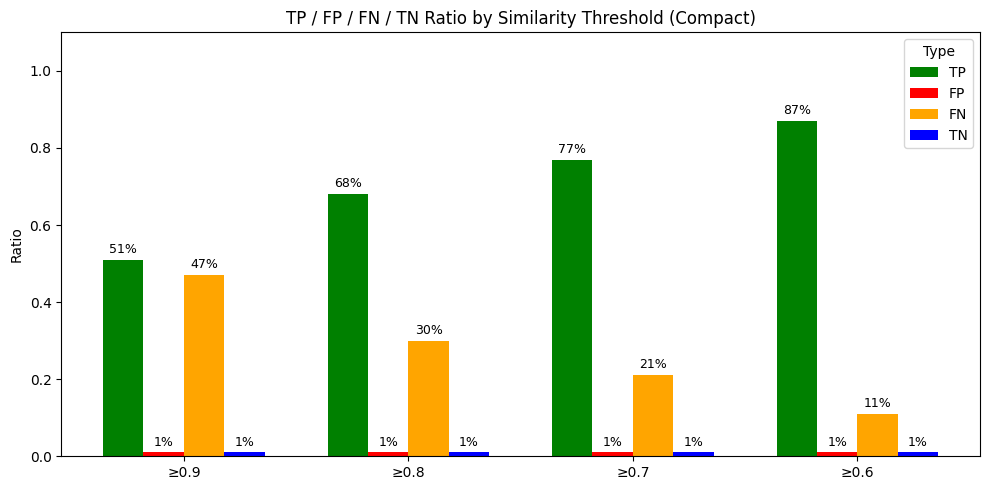

In [ ]:
plot_confusion_grouped_compact_ratio(records, thresholds=[0.9, 0.8, 0.7, 0.6])

In [ ]:
file_paths = [
    "1_100_100_quantized.txt", "1_100_100_quantized_Microsoft.txt", "1_100_100_quantized_dev_1_graph.txt",
    "1_100_100_quantized_jsonAsKnowledge.txt", "1_100_100_quantized_jsonAsKnowledge_20maxTriplet.txt", "1_100_100_quantized_jsonAsKnowledge_5000token.txt",
    "1_100_100_quantized_jsonAsKnowledge_newPrompt.txt", "1_100_100_quantized_jsonAsKnowledge_noLimitTriplet.txt", "1_100_100_quantized_train_1_graph.txt"
]

record_list = []

for file in file_paths:
    print(f"\n🔍 正在处理文件：{file}")

    # 提取该文件中的 records
    records = extract_pa_ta_similarity(file)

    # 保存记录到列表中
    record_list.append({
        'filename': file,
        'records': records
    })

    print(f" 提取 {len(records)} 条记录，已加入 record_list")


🔍 正在处理文件：1_100_100_quantized.txt
[Saved Record] {'PA': 'Time-use research.', 'TA': 'Time-use research', 'Similarity': 0.9554}
[Saved Record] {'PA': 'Time.', 'TA': 'time', 'Similarity': 0.83053}
[Saved Record] {'PA': 'The International System of Units (SI) and the International System of Quantities.', 'TA': 'the International System of Units and International System of Quantities', 'Similarity': 0.90521}
[Saved Record] {'PA': 'Parmenides and Heraclitus.', 'TA': 'Parmenides and Heraclitus', 'Similarity': 0.9849}
[Saved Record] {'PA': 'Universal Time (UT).', 'TA': 'UT or UTC', 'Similarity': 0.69098}
[Saved Record] {'PA': 'Stimulants and depressants.', 'TA': 'Psychoactive drugs', 'Similarity': 0.59282}
[Saved Record] {'PA': 'A calendar.', 'TA': 'the calendar', 'Similarity': 0.88684}
[Saved Record] {'PA': 'A time machine is known as any technological device that is used to achieve time travel.', 'TA': 'to achieve time travel', 'Similarity': 0.63655}
[Saved Record] {'PA': 'The Fukushima Dai

In [ ]:
from tqdm import tqdm

for item in record_list:
    print(f"\n 正在处理模型判断 → {item['filename']}")
    records = item["records"]

    prompts = [build_prompt(r["PA"], r["TA"]) for r in records]

    outputs = test_pipe(prompts, max_new_tokens=50, return_full_text=False, batch_size=8)

    for record, output in zip(records, outputs):
        try:
            text = output[0]["generated_text"].strip().lower()
            record["Model Prediction"] = 1 if "yes" in text else 0
        except Exception as e:
            record["Model Prediction"] = -1
            print(f" 处理失败：{e}")


 正在处理模型判断 → 1_100_100_quantized.txt

 正在处理模型判断 → 1_100_100_quantized_Microsoft.txt

 正在处理模型判断 → 1_100_100_quantized_dev_1_graph.txt

 正在处理模型判断 → 1_100_100_quantized_jsonAsKnowledge.txt

 正在处理模型判断 → 1_100_100_quantized_jsonAsKnowledge_20maxTriplet.txt

 正在处理模型判断 → 1_100_100_quantized_jsonAsKnowledge_5000token.txt

 正在处理模型判断 → 1_100_100_quantized_jsonAsKnowledge_newPrompt.txt

 正在处理模型判断 → 1_100_100_quantized_jsonAsKnowledge_noLimitTriplet.txt


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



 正在处理模型判断 → 1_100_100_quantized_train_1_graph.txt


In [ ]:
for item in record_list:
    filename = item["filename"]
    records = item["records"]

    print(f"\n 文件: {filename}")
    compute_avg_accuracy(records)


 文件: 1_100_100_quantized.txt
 Average Similarity Score: 0.8248
 Model Prediction Accuracy: 0.9800

 文件: 1_100_100_quantized_Microsoft.txt
 Average Similarity Score: 0.5522
 Model Prediction Accuracy: 0.6300

 文件: 1_100_100_quantized_dev_1_graph.txt
 Average Similarity Score: 0.7400
 Model Prediction Accuracy: 0.9100

 文件: 1_100_100_quantized_jsonAsKnowledge.txt
 Average Similarity Score: 0.4447
 Model Prediction Accuracy: 0.5800

 文件: 1_100_100_quantized_jsonAsKnowledge_20maxTriplet.txt
 Average Similarity Score: 0.5299
 Model Prediction Accuracy: 0.7300

 文件: 1_100_100_quantized_jsonAsKnowledge_5000token.txt
 Average Similarity Score: 0.4353
 Model Prediction Accuracy: 0.5600

 文件: 1_100_100_quantized_jsonAsKnowledge_newPrompt.txt
 Average Similarity Score: 0.5200
 Model Prediction Accuracy: 0.7700

 文件: 1_100_100_quantized_jsonAsKnowledge_noLimitTriplet.txt
 Average Similarity Score: 0.5287
 Model Prediction Accuracy: 0.7300

 文件: 1_100_100_quantized_train_1_graph.txt
 Average Simil